# Import Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

# 1.0 Data Understanding and Exploratory Data Analysis (EDA)
# 1.1 Load Dataset 

In [143]:
# Load dataset
df = pd.read_csv('video_games_sales.csv')


# Display first five rows
df.head()


,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion
0,Sports,2002-01-01,108592,2002,1,Xbox,1,0
1,RPG,2002-02-01,129387,2002,4,Nintendo,0,0
2,Sports,2002-03-01,114777,2002,4,PC,0,0
3,Sports,2002-04-01,71738,2002,0,Nintendo,0,0
4,Simulation,2002-05-01,142512,2002,2,PlayStation,0,0


In [144]:
## Rename the month column to date, set date as index

df.rename(columns={"Month": "Date", "Monthly Sales": "Monthly_Sales"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df["Month_Name"] = df["Date"].dt.month_name()
df.set_index('Date', inplace=True)

#confirm the operation above
df.head(1)

,Category,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Name
Date,,,,,,,,
2002-01-01,Sports,108592,2002,1,Xbox,1,0,January


# 1.2 Dataset Summary

In [145]:
# Check dataset shape
print(f"The Dataset shape is: {df.shape}")

print("----------------------------------")

# Dataset info
df.info()

The Dataset shape is: (264, 8)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 2002-01-01 to 2023-12-01
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       264 non-null    object
 1   Monthly_Sales  264 non-null    int64 
 2   Year           264 non-null    int64 
 3   DayOfWeek      264 non-null    int64 
 4   Platform       264 non-null    object
 5   Holiday        264 non-null    int64 
 6   Promotion      264 non-null    int64 
 7   Month_Name     264 non-null    object
dtypes: int64(5), object(3)
memory usage: 18.6+ KB


In [146]:
# Check for missing values and percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

# Combine the results into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Value Description:")
print(missing_summary)

Missing Value Description:
               Missing Values  Percentage
Category                    0         0.0
Monthly_Sales               0         0.0
Year                        0         0.0
DayOfWeek                   0         0.0
Platform                    0         0.0
Holiday                     0         0.0
Promotion                   0         0.0
Month_Name                  0         0.0


In [147]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

print("---------------------------------------")

# Check unique values
print(f"Unique values:\n{df.nunique()}")

The dataset contains 0 duplicate rows that need to be removed.
---------------------------------------
Unique values:
Category           5
Monthly_Sales    264
Year              22
DayOfWeek          7
Platform           4
Holiday            2
Promotion          2
Month_Name        12
dtype: int64


In [148]:
# Check unique values for categorical features
print("Unique Values in Categorical Features:")
print("---------------------------------------")
print(f"1. Category: {df['Category'].unique()}")
print("---------------------------------------")
print(f"2. Platform: {df['Platform'].unique()}")
print("---------------------------------------")
print(f"3. Holiday: {df['Holiday'].unique()}")
print("---------------------------------------")
print(f"4. Promotion: {df['Promotion'].unique()}")
print("---------------------------------------")
print(f"5. Year: {df['Year'].unique()}")

Unique Values in Categorical Features:
---------------------------------------
1. Category: ['Sports' 'RPG' 'Simulation' 'FPS' 'Adventure']
---------------------------------------
2. Platform: ['Xbox' 'Nintendo' 'PC' 'PlayStation']
---------------------------------------
3. Holiday: [1 0]
---------------------------------------
4. Promotion: [0 1]
---------------------------------------
5. Year: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022 2023]


# 1.3 Statistical Analysis

In [149]:
# Summary statistics
df.describe(include='all').round(2)

,Category,Monthly_Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Month_Name
count,264,264.00,264.00,264.00,264,264.00,264.0,264
unique,5,NaN,NaN,NaN,4,NaN,NaN,12
top,Sports,NaN,NaN,NaN,Xbox,NaN,NaN,January
freq,59,NaN,NaN,NaN,76,NaN,NaN,22
mean,NaN,112349.00,2012.50,3.01,NaN,0.17,0.2,NaN
std,NaN,34144.61,6.36,2.00,NaN,0.37,0.4,NaN
min,NaN,10469.00,2002.00,0.00,NaN,0.00,0.0,NaN
25%,NaN,88873.75,2007.00,1.00,NaN,0.00,0.0,NaN
50%,NaN,112947.50,2012.50,3.00,NaN,0.00,0.0,NaN
75%,NaN,135193.50,2018.00,5.00,NaN,0.00,0.0,NaN


## 2.0 EDA

# 2.1 Univariate analysis

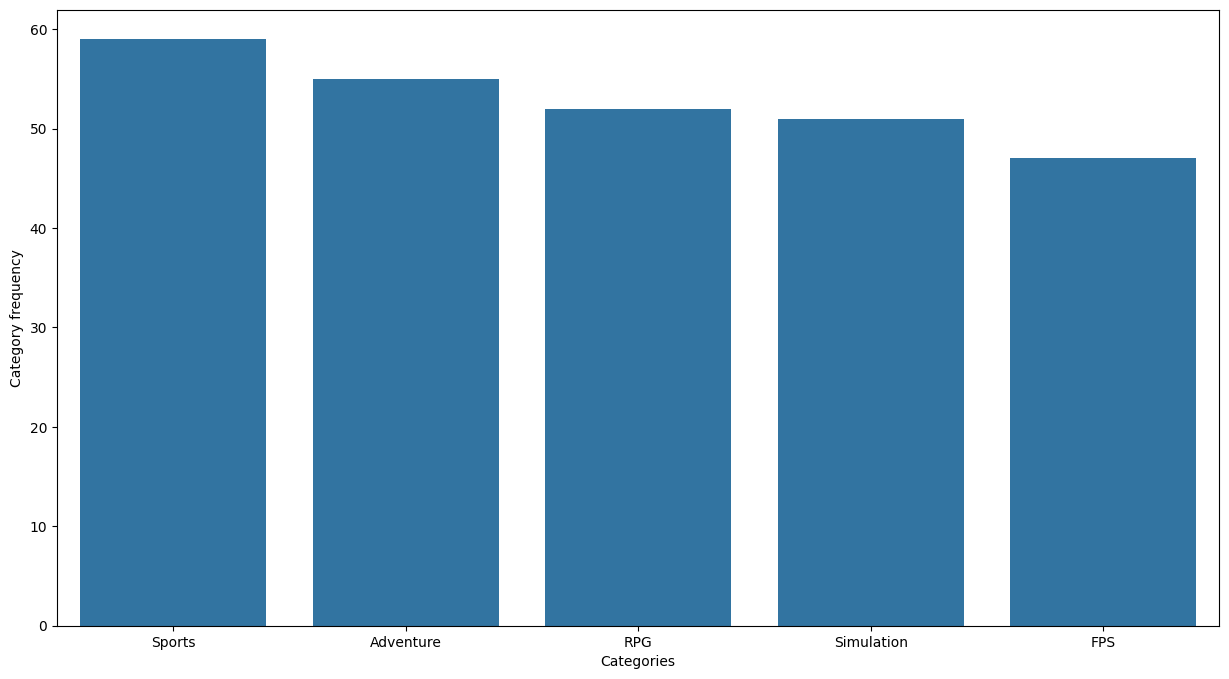

In [150]:
## category count plot

category_order = df["Category"].value_counts().index.tolist()


plt.figure(figsize = (15, 8))


sns.countplot(data = df, x = "Category", order= category_order)

plt.xlabel("Categories")
plt.ylabel("Category frequency")

plt.show(); plt.close()

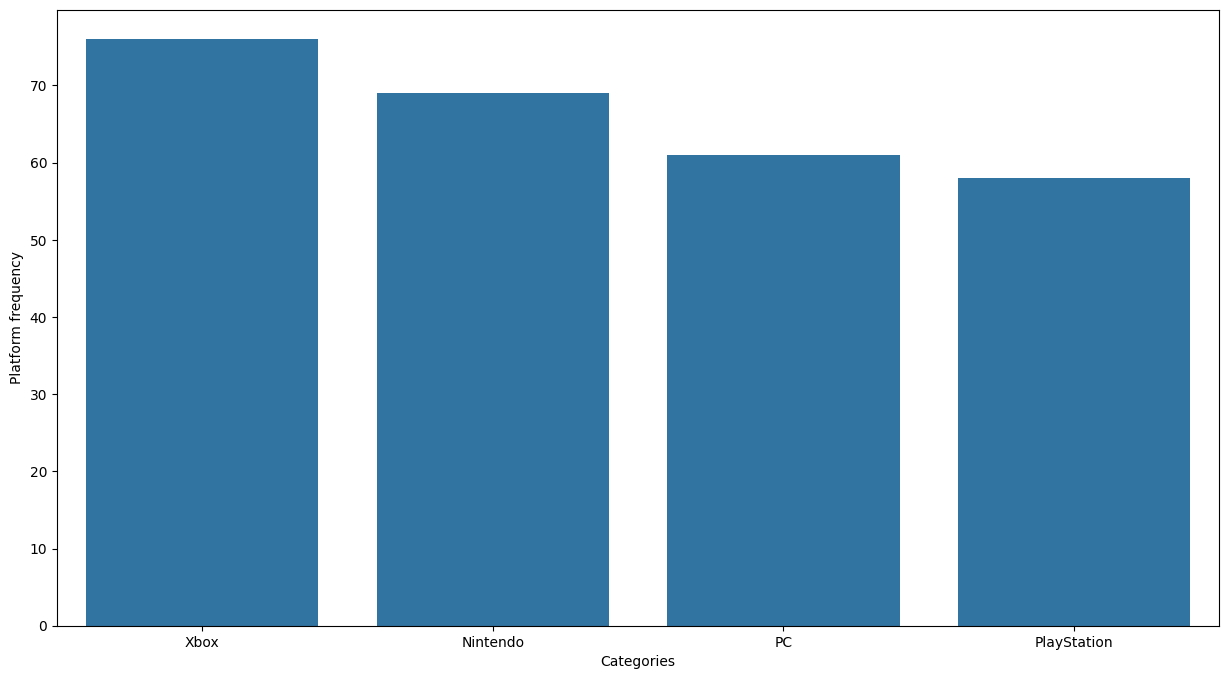

In [151]:
## platform count plot

platform_order = df["Platform"].value_counts().index.tolist()

plt.figure(figsize = (15, 8))

sns.countplot(data = df, x = "Platform", order= platform_order)

plt.xlabel("Categories")
plt.ylabel("Platform frequency")

plt.show(); plt.close()

<Axes: xlabel='Monthly_Sales'>

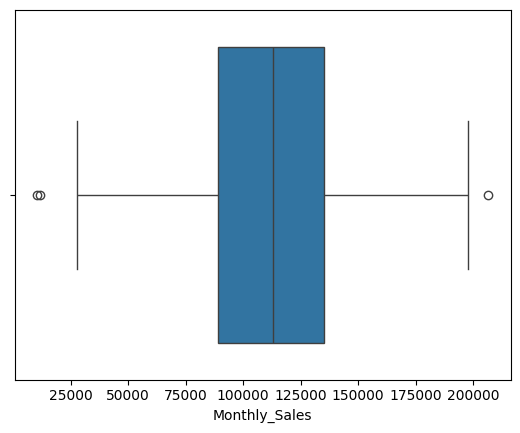

In [152]:
# check for outliers in Monthly Sales
sns.boxplot(x=df["Monthly_Sales"])

# 2.2 Bivariate analysis

In [153]:
# Get minimum and maximum year and month
min_date = df.index.min()
max_date = df.index.max()
print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")


Minimum date: 2002-01-01 00:00:00
Maximum date: 2023-12-01 00:00:00


In [154]:
##discuss it

# Category by Year Sales
#plt.figure(figsize=(15,10))

#sns.countplot(data = df, x = 'Category', hue = 'Platform')

#plt.xlabel("Category By Platform Sales")
#plt.ylabel("Frequency")
#plt.show()

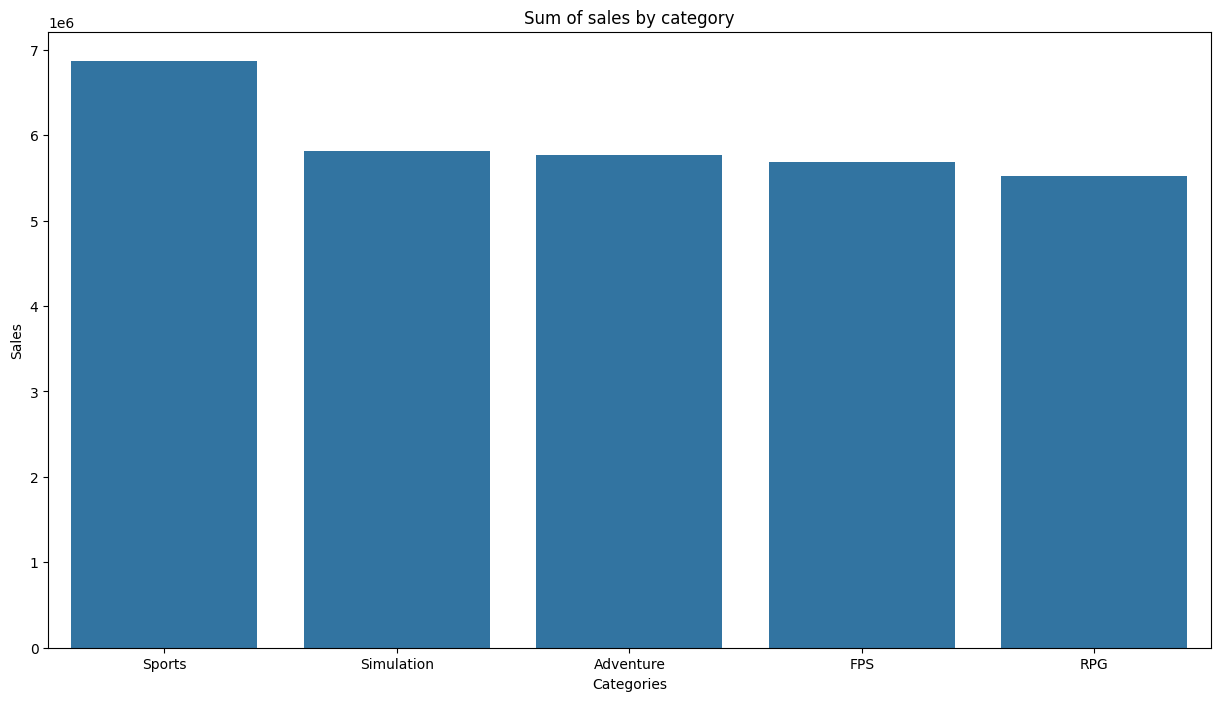

In [155]:
## Sales by category

category_order = df.groupby("Category")["Monthly_Sales"].sum().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", estimator = sum, order = category_order , errorbar=None)

plt.title("Sum of sales by category")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

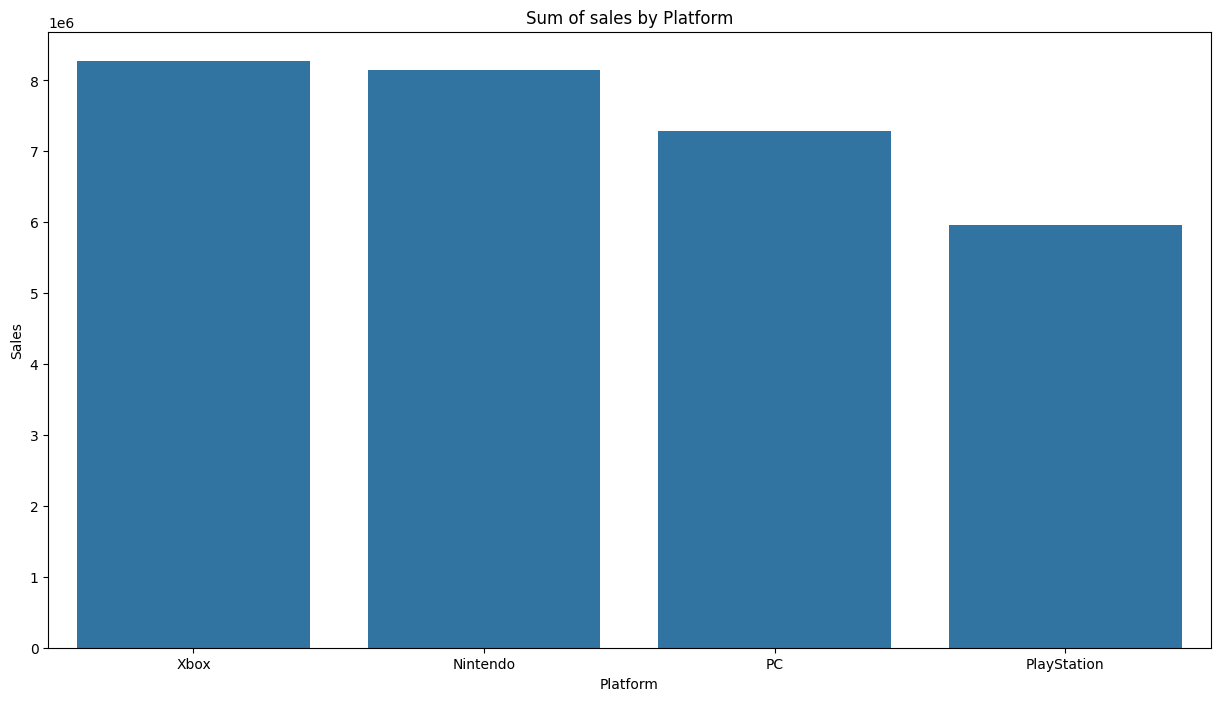

In [156]:
## Sales by platform

category_order = df.groupby("Platform")["Monthly_Sales"].sum().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", estimator = sum, order = category_order , errorbar=None)

plt.title("Sum of sales by Platform")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

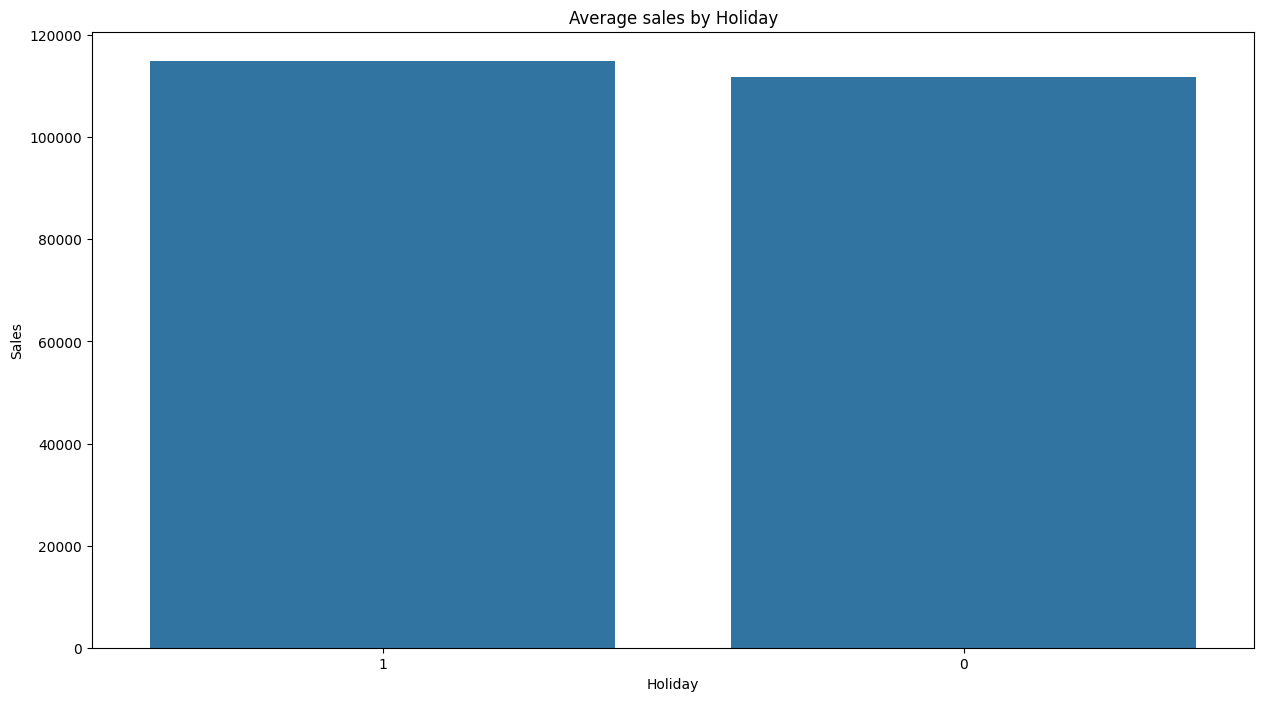

In [157]:
## Sales by Holiday

category_order = df.groupby("Holiday")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Holiday", y= "Monthly_Sales", order = category_order, errorbar=None )

plt.title("Average sales by Holiday")
plt.xlabel("Holiday")
plt.ylabel("Sales")

plt.show(); plt.close()

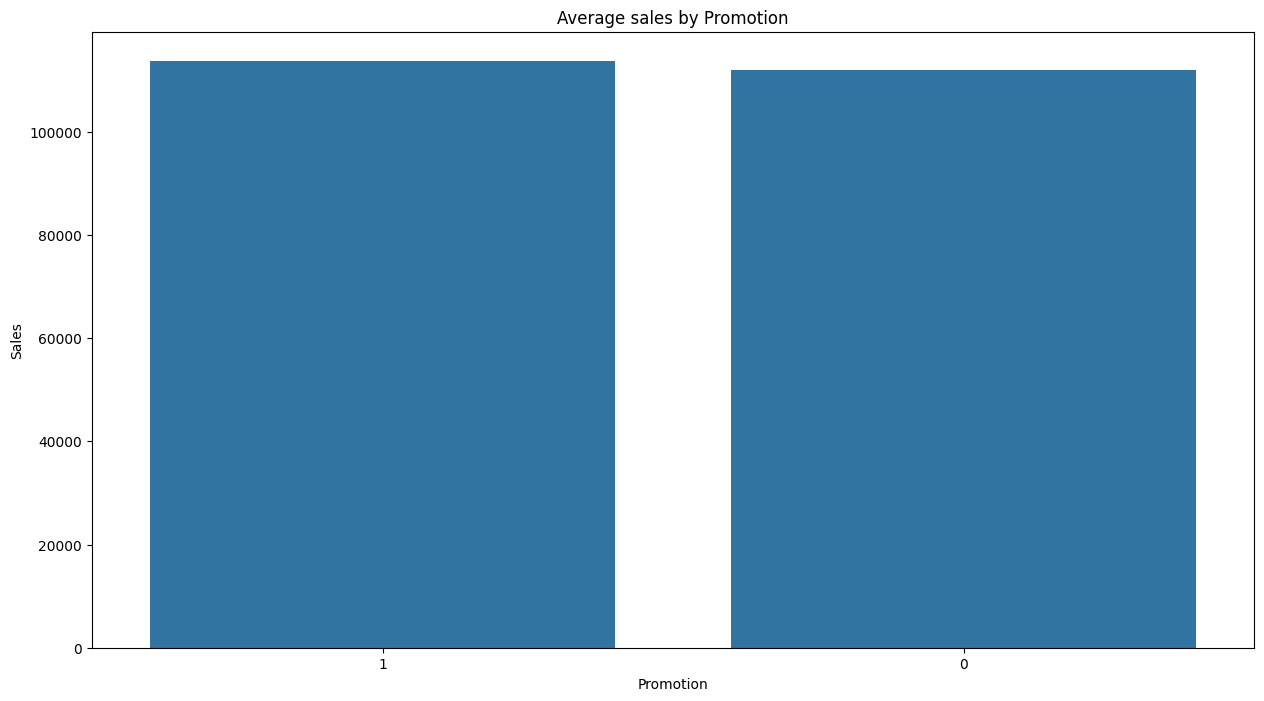

In [158]:
## Sales by Promotion

category_order = df.groupby("Promotion")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Promotion", y= "Monthly_Sales", order = category_order , errorbar=None)

plt.title("Average sales by Promotion")
plt.xlabel("Promotion")
plt.ylabel("Sales")

plt.show(); plt.close()

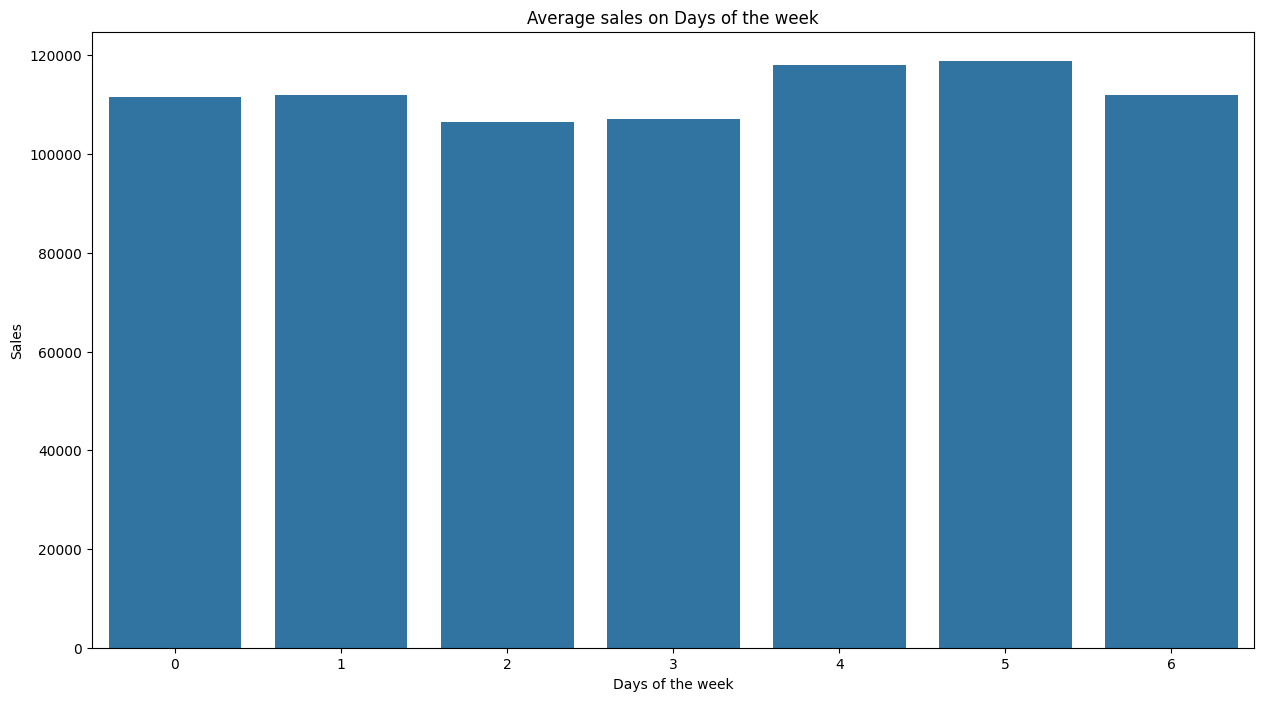

In [159]:
## Sales by Day of Week

#category_order = df.groupby("DayOfWeek")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "DayOfWeek", y= "Monthly_Sales", errorbar=None)

plt.title("Average sales on Days of the week")
plt.xlabel("Days of the week")
plt.ylabel("Sales")

plt.show(); plt.close()

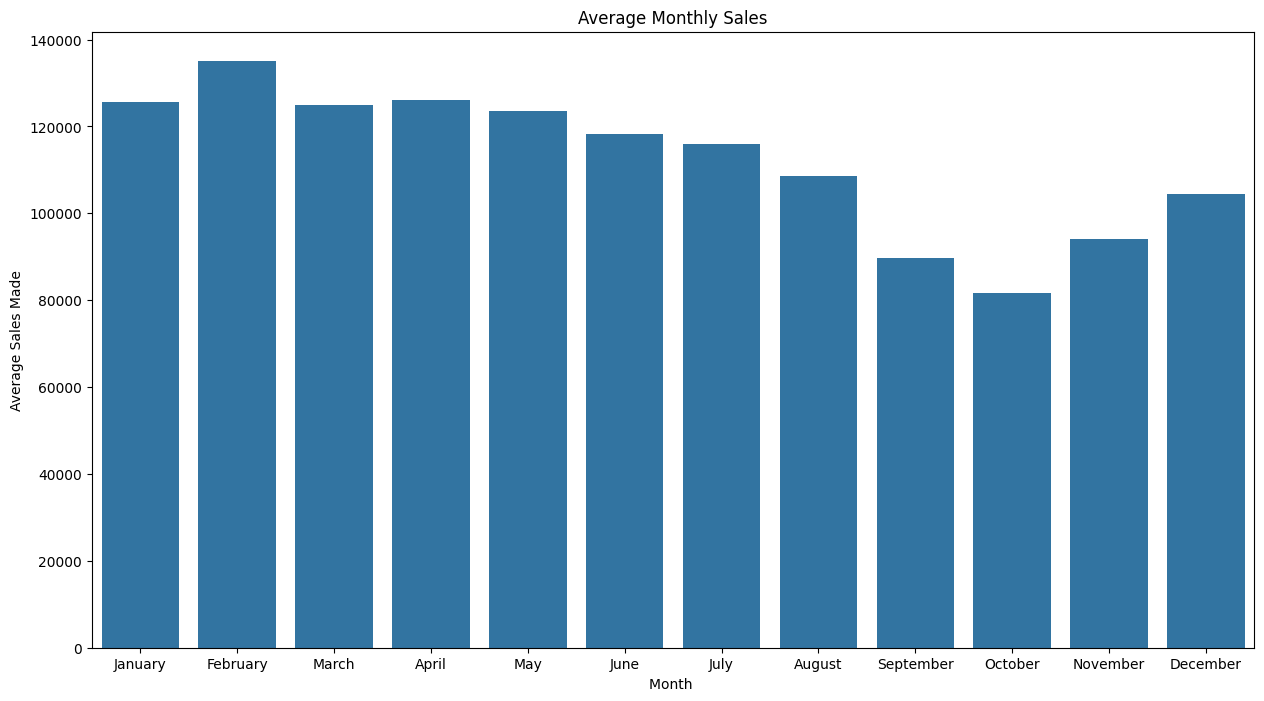

In [160]:
## visualize sales by month

# category_order = df.groupby("Month_Name")["Monthly_Sales"].mean().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", errorbar=None)

plt.title("Average Monthly Sales")
plt.xlabel("Month ")
plt.ylabel("Average Sales Made")

plt.show()

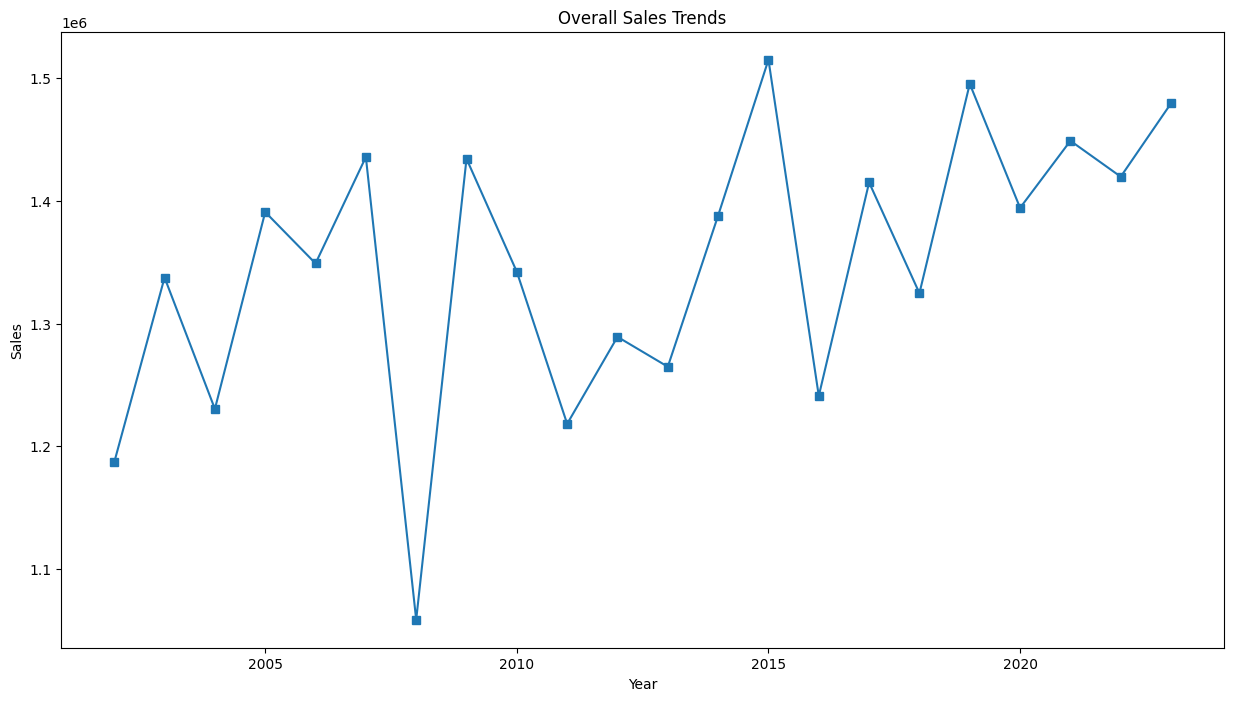

In [161]:

# Aggregate data for time series analysis
monthly_sales = df['Monthly_Sales']

# Overall sales trends
df.groupby('Year')['Monthly_Sales'].sum().plot(title="Overall Sales Trends", xlabel="Year", ylabel="Sales", marker = "s", figsize=(15, 8))
plt.show()

## Multivariate Analysis

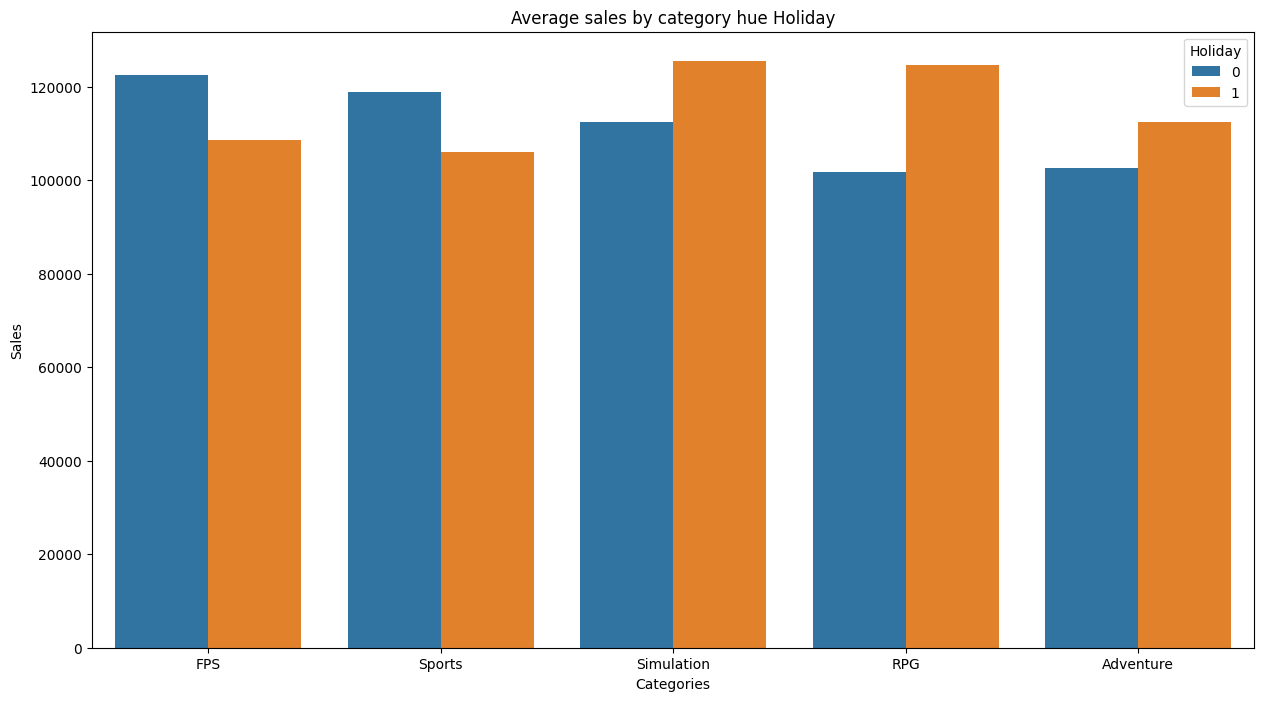

In [162]:
## Sales by category against Holiday

category_order = df.groupby("Category")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", hue= "Holiday", order = category_order , errorbar=None)

plt.title("Average sales by category hue Holiday")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

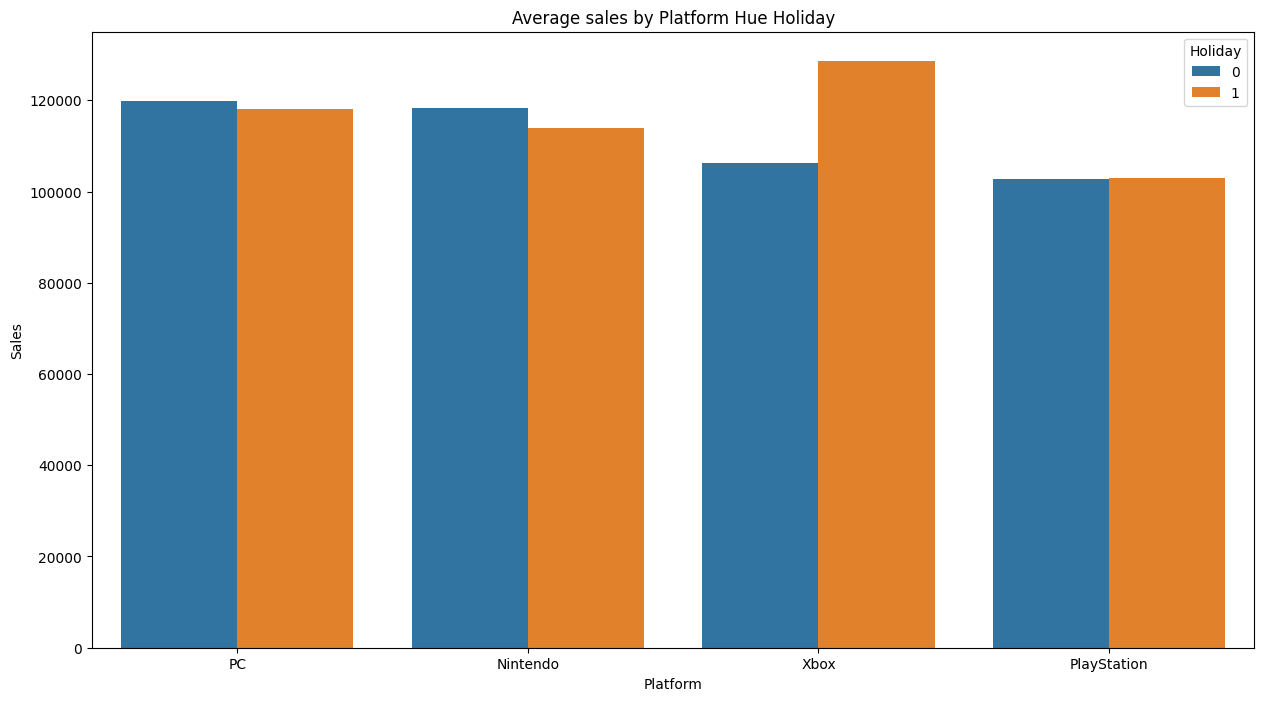

In [163]:
## Sales by platform against Holiday

category_order = df.groupby("Platform")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", hue= "Holiday", order = category_order , errorbar=None)

plt.title("Average sales by Platform Hue Holiday")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

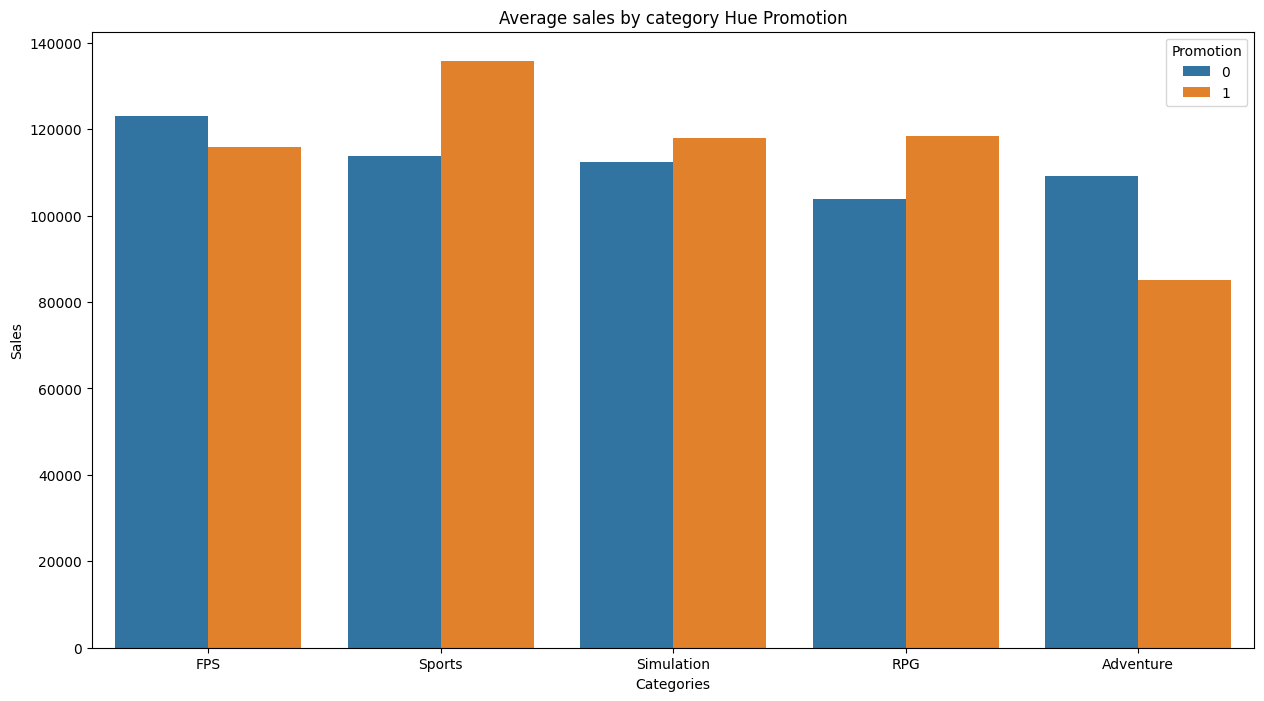

In [164]:
## Sales by category against Promotion

category_order = df.groupby("Category")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Category", y= "Monthly_Sales", hue= "Promotion", order = category_order , errorbar=None)

plt.title("Average sales by category Hue Promotion")
plt.xlabel("Categories")
plt.ylabel("Sales")

plt.show(); plt.close()

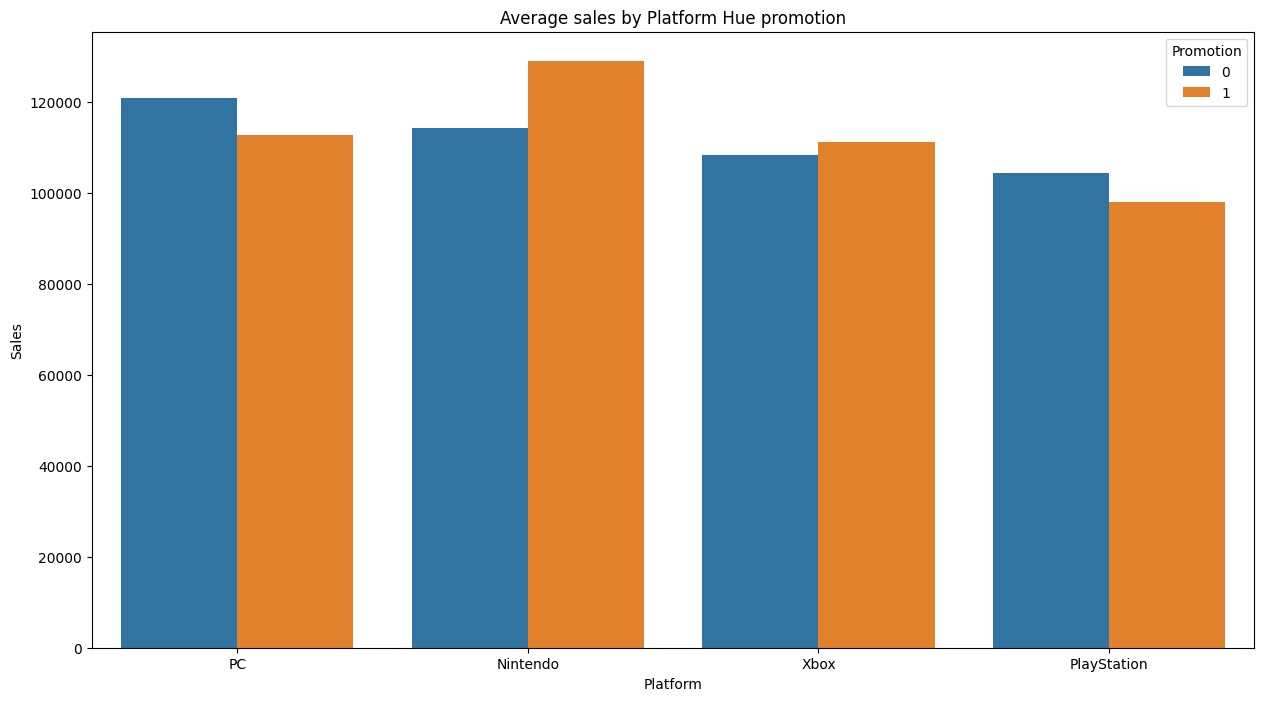

In [165]:
## Sales by platform against Promotion

category_order = df.groupby("Platform")["Monthly_Sales"].mean().sort_values(ascending=False).index


plt.figure(figsize = (15, 8))


sns.barplot(data = df, x = "Platform", y= "Monthly_Sales", hue= "Promotion", order = category_order , errorbar=None)

plt.title("Average sales by Platform Hue promotion")
plt.xlabel("Platform")
plt.ylabel("Sales")

plt.show(); plt.close()

Text(0, 0.5, 'Sales Made')

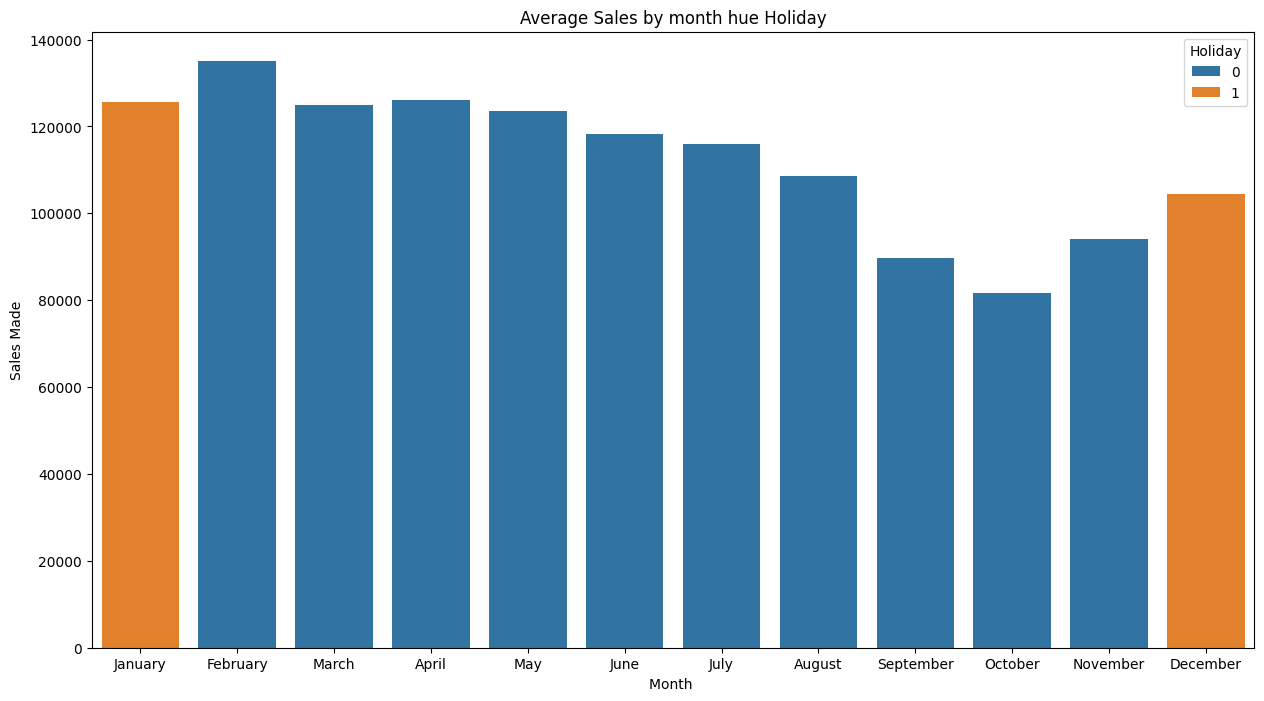

In [166]:
## Average sales by month hue Holiday

#category_order = df.groupby("Month_Name")["Monthly_Sales"].mean().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", hue= "Holiday", errorbar=None)

plt.title("Average Sales by month hue Holiday")
plt.xlabel("Month ")
plt.ylabel("Sales Made")

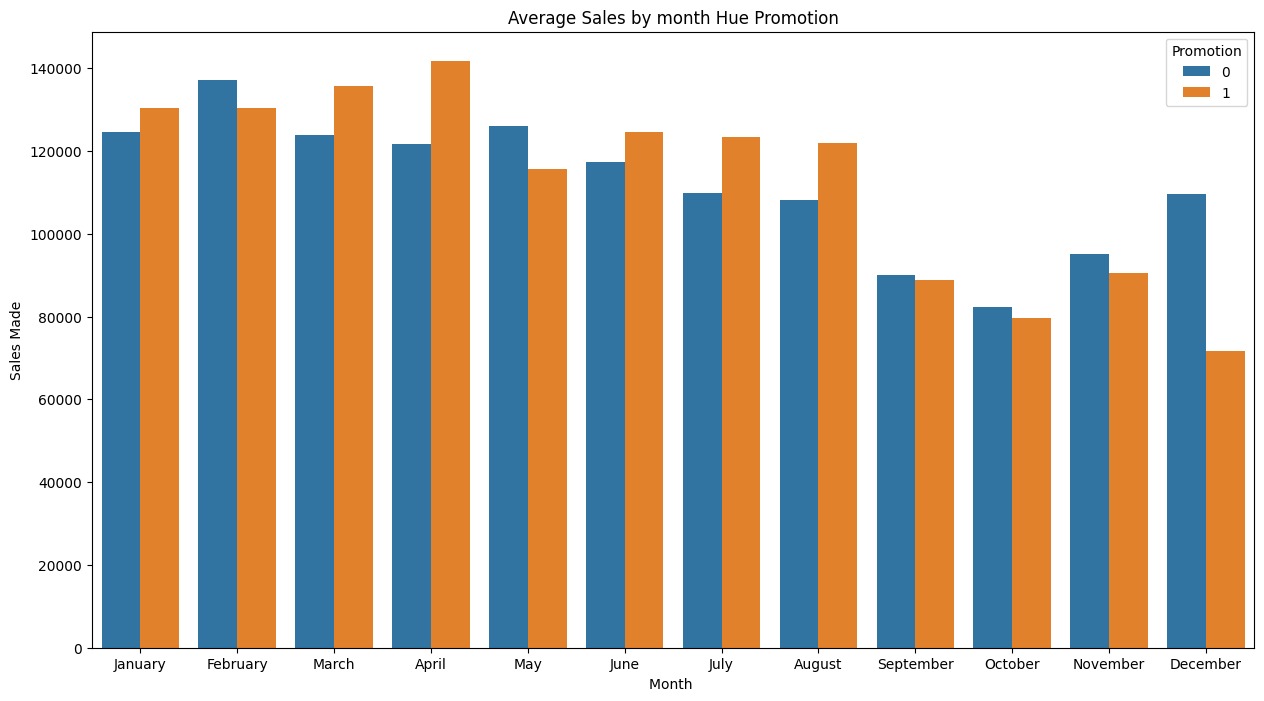

In [167]:
## Average sales by month hue Promotion

#category_order = df.groupby("Month_Name")["Monthly_Sales"].mean().sort_values(ascending=False).index

plt.figure(figsize = (15, 8))

sns.barplot(data = df, x = "Month_Name", y = "Monthly_Sales", hue= "Promotion", errorbar=None)

plt.title("Average Sales by month Hue Promotion")
plt.xlabel("Month ")
plt.ylabel("Sales Made")

plt.show()

In [168]:
# Impact of Holidays and Promotions
#holiday_sales = df[df['Holiday'] == 1]['Monthly_Sales'].mean()
#promotion_sales = df[df['Promotion'] == 1]['Monthly_Sales'].mean()
#print(f"Average sales during holidays: {holiday_sales}")
#print(f"Average sales during promotions: {promotion_sales}")

# Check the Stationality and Seasonality of the Data
 Mathods
 1. Visual Inspection
 2. Global vs Local Check
 3. ADG(Augmented Dickney Fuller) Test -Statistical Tests
 4. KPPS Test - Statistical Tests
 
 # Time Series Models
 1. Auto-Regression Model
 2. MA (Moving Average) Model
 3. ARMA( Auto Regression Moving Average) 
 4. ARIMA ( Auto Regression  Integrated Moving Average)) - almost  the same as ARMA, just does only one simple operation of convering non-stationary series to stationary series before
 5. ETS
 5. RNN
 5. LSTM

 # ACF  AND PACF Plots : measure the corellation between current time periods and previous time lags
**Correlation** is an indicator of relationship between 2 variables
**Auto-correlation**: Relationship of a variable with itd previous time period values(lags). Used Perason Corellation Co-efficient [-1.1]

**Auto-correlation Function**: Direct  and indirect effect of values in previous time lags on current value. Used to find order on MA Model
**Partial Auto-correlation Function**: Only direct effect of values in previous time lags on current value. Used to find order on Auto-Regression Model

# Step 2: Stationarity and Seasonality Checks


# ADF Test

In [169]:
# ADF Test
adf_result = adfuller(monthly_sales)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] <= 0.05:
    print("The data is stationary based on the ADF test.")
else:
    print("The data is not stationary based on the ADF test.")

ADF Statistic: -4.471046070251256
p-value: 0.00022173509005268726
The data is stationary based on the ADF test.


# KPSS Test

In [170]:
# KPSS Test
def kpss_test(series):
    kpss_stat, p_value, _, _ = kpss(series, regression='c')
    print('KPSS Statistic:', kpss_stat)
    print('p-value:', p_value)
    if p_value < 0.05:
        print("The data is not stationary based on the KPSS test.")
    else:
        print("The data is stationary based on the KPSS test.")

kpss_test(monthly_sales)

KPSS Statistic: 0.29054120896019925
p-value: 0.1
The data is stationary based on the KPSS test.


# Seasonal decomposition

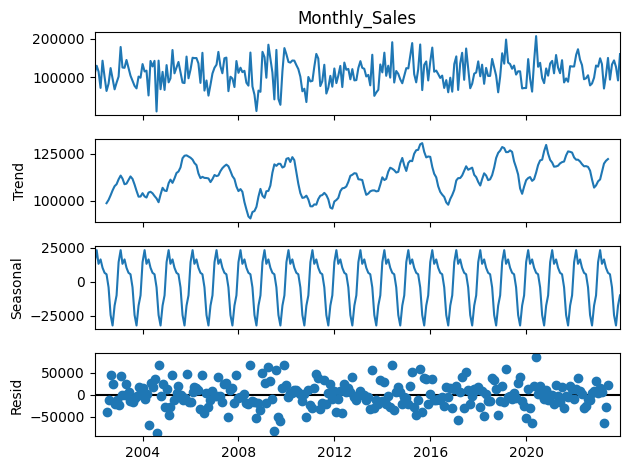

In [171]:
# Seasonal decomposition
result = seasonal_decompose(monthly_sales, model='additive', period=12)
result.plot()
plt.show()

# ACF and PACF plots

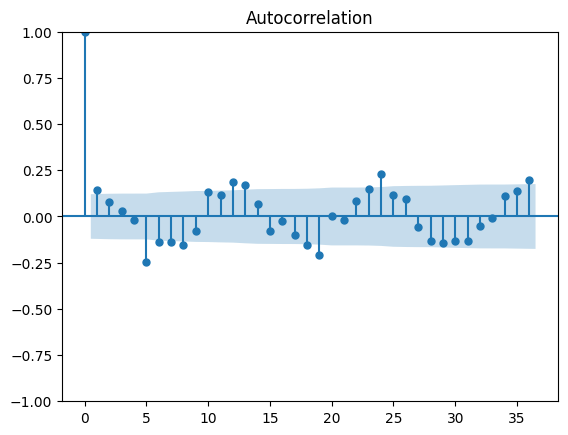

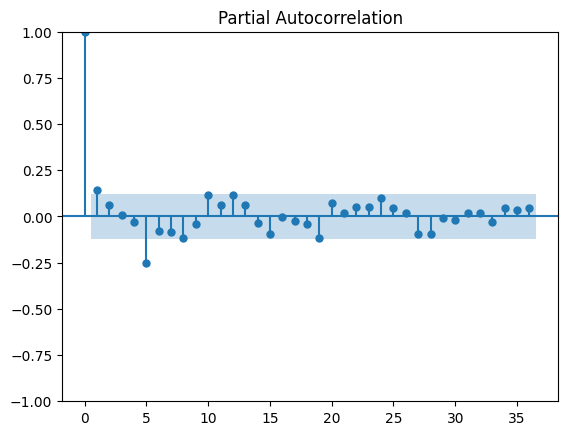

In [172]:
# ACF and PACF plots
plot_acf(monthly_sales, lags=36)
plt.show()
plot_pacf(monthly_sales, lags=36)
plt.show()

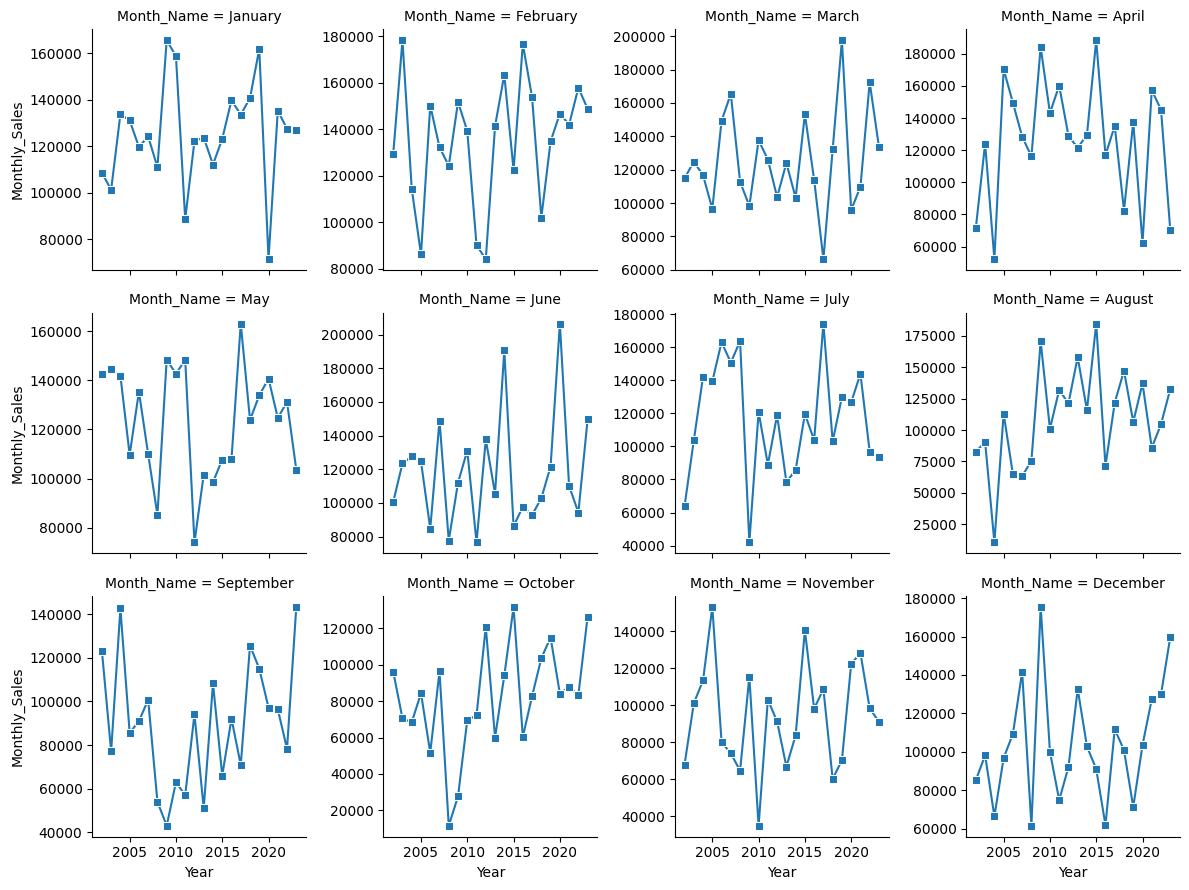

In [173]:
# Create a facet grid of line plots, one per month, showing values across years

seasonal_df = df.copy()
g = sns.FacetGrid(seasonal_df, col='Month_Name', col_wrap=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Monthly_Sales', marker = "s")
plt.show()


 # Step 3: Build Models

In [174]:

# Splitting data into train and test sets
train = monthly_sales[:-4]
test = monthly_sales[-4:]

In [175]:
# ARIMA model
model_arima = ARIMA(train, order=(2, 1, 2))  # Example order, adjust based on ACF/PACF
results_arima = model_arima.fit()
print(results_arima.summary())


                               SARIMAX Results                                
Dep. Variable:          Monthly_Sales   No. Observations:                  260
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3073.473
Date:                Tue, 17 Dec 2024   AIC                           6156.945
Time:                        02:12:35   BIC                           6174.729
Sample:                    01-01-2002   HQIC                          6164.096
                         - 08-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7722      0.113     -6.850      0.000      -0.993      -0.551
ar.L2          0.1844      0.077      2.386      0.017       0.033       0.336
ma.L1         -0.0577      0.086     -0.669      0.5

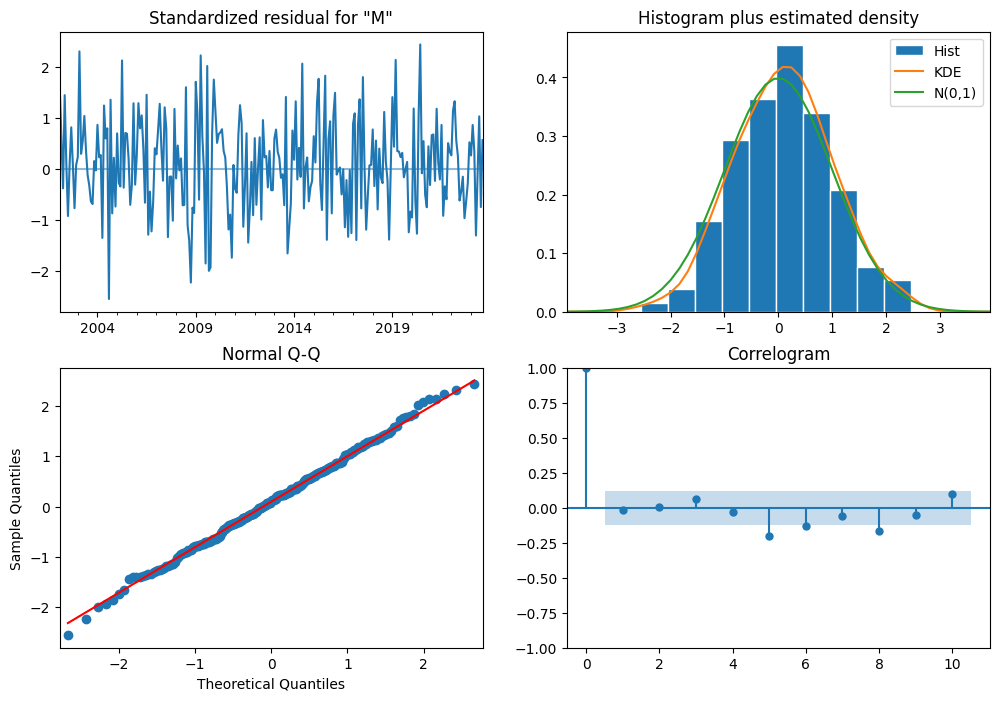

In [176]:
# Plot diagnostics
results_arima.plot_diagnostics(figsize=(12, 8))
plt.show()

In [177]:
# Forecast with ARIMA
forecast_arima = results_arima.forecast(steps=4)

In [178]:
# ETS (Exponential Smoothing)
model_ets = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
forecast_ets = model_ets.forecast(steps=4)

In [181]:
# FB Prophet
prophet_data = df.reset_index()[['Date', 'Monthly_Sales']]
prophet_data.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(prophet_data)


02:13:06 - cmdstanpy - INFO - Chain [1] start processing
02:13:07 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
# Future dataframe for Prophet
future_dates = model_prophet.make_future_dataframe(periods=4, freq='MS')
forecast_prophet = model_prophet.predict(future_dates)

# Step 4: Evaluate Models

In [183]:
# Calculate RMSE for ARIMA
rmse_arima = sqrt(mean_squared_error(test, forecast_arima))
print(f"ARIMA RMSE: {rmse_arima}")

ARIMA RMSE: 28417.864910208646


In [184]:
# Calculate RMSE for ETS
rmse_ets = sqrt(mean_squared_error(test, forecast_ets))
print(f"ETS RMSE: {rmse_ets}")

ETS RMSE: 42299.896741645396


In [185]:
# FB Prophet RMSE
forecast_prophet_test = forecast_prophet.iloc[-8:-4]['yhat']
rmse_prophet = sqrt(mean_squared_error(test, forecast_prophet_test))
print(f"FB Prophet RMSE: {rmse_prophet}")

FB Prophet RMSE: 37904.205814238965


In [186]:
# Compare models
if rmse_arima < rmse_ets and rmse_arima < rmse_prophet:
    print("ARIMA is the best model.")
    final_forecast = forecast_arima
elif rmse_ets < rmse_arima and rmse_ets < rmse_prophet:
    print("ETS is the best model.")
    final_forecast = forecast_ets
else:
    print("FB Prophet is the best model.")
    final_forecast = forecast_prophet.iloc[-4:]['yhat']

ARIMA is the best model.


# Step 5: Final Forecast

In [187]:
# Step 5: Final Forecast
print("Forecast for the next 4 months:")
print(final_forecast)

Forecast for the next 4 months:
2023-09-01    116317.280791
2023-10-01    116682.887415
2023-11-01    113380.771832
2023-12-01    115998.181198
Freq: MS, Name: predicted_mean, dtype: float64


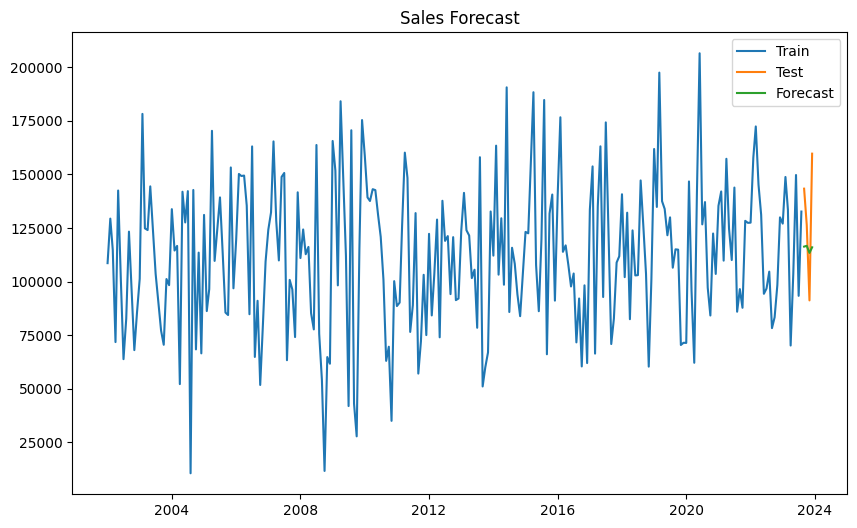

In [188]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(final_forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Sales Forecast')
plt.show()

In [189]:
import matplotlib.pyplot as plt

# Plot the forecast using Matplotlib
fig = model_prophet.plot(forecast_prophet_plot)
plt.show()


NameError: name 'forecast_prophet_plot' is not defined

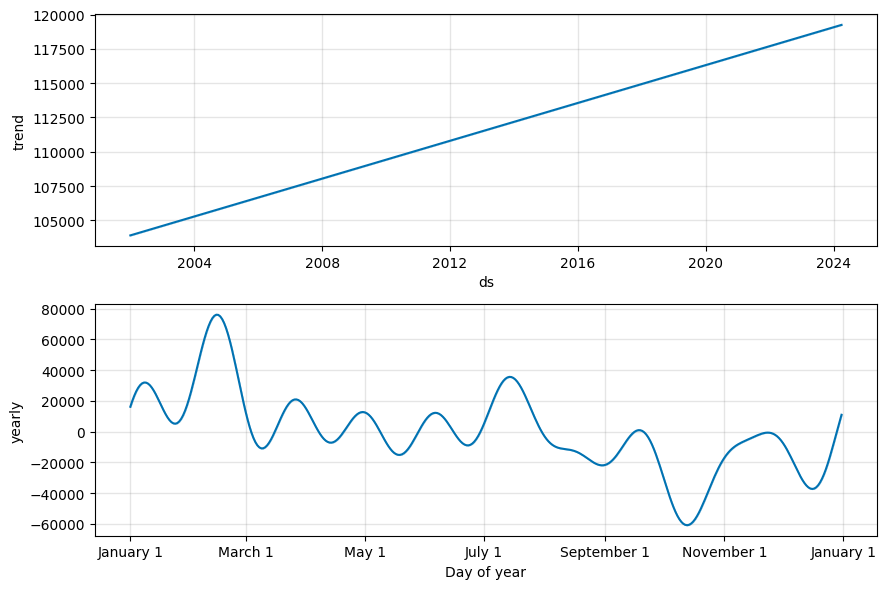

In [190]:
# Prophet Components Plot
model_prophet.plot_components(forecast_prophet)
plt.show()